# Jason Tsai

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [275]:
os.getcwd()

'C:\\Users\\Home\\Desktop'

In [276]:
data = pd.read_csv("C:\\Users\\Home\\Desktop\\covid_pop_char.csv")
data.head()

,Specimen Collection Date,Characteristic Type,Characteristic Group,Characteristic Group Sort Order,New Cases,Cumulative Cases,Population Estimate,Data As Of,Data Loaded At
0,03/03/2020 12:00:00 AM,Age Group,0-4,1,NaN,NaN,39353.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
1,03/03/2020 12:00:00 AM,Age Group,5-10,2,NaN,NaN,38089.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:38 AM
2,03/03/2020 12:00:00 AM,Age Group,11-13,3,NaN,NaN,17896.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
3,03/03/2020 12:00:00 AM,Age Group,14-17,4,NaN,NaN,22832.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
4,03/03/2020 12:00:00 AM,Age Group,18-20,5,NaN,NaN,20407.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM


In [277]:
data['Characteristic Group'].unique()

array(['0-4', '5-10', '11-13', '14-17', '18-20', '21-24', '25-29',
       '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'Unknown',
       'None', 'One or More', 'Female', 'Male', 'Trans Female',
       'Trans Male', 'Other', 'Homeless', 'Not Homeless', 'Asian',
       'Black or African American', 'Hispanic or Latino/a, all races',
       'Native American', 'Native Hawaiian or Other Pacific Islander',
       'White', 'Multi-racial', 'Bisexual', 'Gay or Lesbian',
       'Heterosexual', 'Declined', 'Unsure',
       'Single Room Occupancy Tenant',
       'Not a Single Room Occupancy Tenant',
       'Skilled Nursing Facility Occupant',
       'Not a Skilled Nursing Facility Occupant', 'Community',
       'From Contact'], dtype=object)

In [278]:
race = data[(data["Characteristic Group"] == "Black or African American") | (data["Characteristic Group"] == "Asian") | (data["Characteristic Group"] == "Hispanic or Latino/a, all races") | (data["Characteristic Group"] == "White") | (data["Characteristic Group"] == "Native American") | (data["Characteristic Group"] == "Native Hawaiian or Other Pacific Islander")]
race

,Specimen Collection Date,Characteristic Type,Characteristic Group,Characteristic Group Sort Order,New Cases,Cumulative Cases,Population Estimate,Data As Of,Data Loaded At
25,03/03/2020 12:00:00 AM,Race/Ethnicity,Asian,1,NaN,NaN,298108.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:49 AM
26,03/03/2020 12:00:00 AM,Race/Ethnicity,Black or African American,2,NaN,NaN,43782.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:52 AM
27,03/03/2020 12:00:00 AM,Race/Ethnicity,"Hispanic or Latino/a, all races",3,NaN,NaN,133314.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:51 AM
28,03/03/2020 12:00:00 AM,Race/Ethnicity,Native American,4,NaN,NaN,1634.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:54 AM
29,03/03/2020 12:00:00 AM,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,5,NaN,NaN,2934.0,08/10/2021 04:30:02 PM,08/11/2021 09:02:06 AM
...,...,...,...,...,...,...,...,...,...
25034,08/06/2021 12:00:00 AM,Race/Ethnicity,Black or African American,2,23.0,3145.0,43782.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:54 AM
25035,08/06/2021 12:00:00 AM,Race/Ethnicity,"Hispanic or Latino/a, all races",3,49.0,16313.0,133314.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:53 AM
25036,08/06/2021 12:00:00 AM,Race/Ethnicity,Native American,4,0.0,137.0,1634.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:55 AM
25037,08/06/2021 12:00:00 AM,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,5,1.0,531.0,2934.0,08/10/2021 04:30:02 PM,08/11/2021 09:02:06 AM


In [279]:
df = race.rename(columns={'Characteristic Group': 'race'}, index={'ONE': 'Row_1'})

In [280]:
# clean out nulls
df = df[df["New Cases"].notnull()]
df["New Cases"].unique()

array([  5.,   0.,   4.,   1.,   3.,   2.,   6.,   8.,  21.,  12.,  10.,
         9.,   7.,  13.,  14.,  15.,  11.,  18.,  16.,  20.,  32.,  23.,
        26.,  22.,  19.,  52.,  25.,  31.,  35.,  28.,  17.,  29.,  27.,
        34.,  33.,  24.,  44.,  38.,  36.,  45.,  40.,  48.,  37.,  39.,
        47.,  63.,  46.,  72.,  81.,  64.,  78.,  85.,  65.,  75.,  67.,
        61.,  62.,  42.,  54.,  70.,  53.,  87.,  66.,  82.,  57.,  60.,
        30.,  50.,  41.,  49.,  55.,  68.,  74.,  51.,  77.,  59.,  56.,
        43.,  79., 103., 121.,  58., 114., 130., 100.,  76.,  69., 116.,
       138., 105., 152.,  99.,  95., 122., 142., 108.,  84., 132., 133.,
       115.,  97.,  83., 168.,  98., 166., 107., 147., 118.,  73., 112.,
       125., 204., 159.,  86., 174., 151.,  91.,  96., 129.,  89., 145.,
       113., 101.,  88., 123.,  71.,  92., 164.,  80., 167., 109., 104.])

In [281]:
new_df = df.groupby('race')["New Cases"].sum()
new_df = pd.DataFrame(new_df)
new_df

,New Cases
race,
Asian,7707.0
Black or African American,3141.0
"Hispanic or Latino/a, all races",16312.0
Native American,135.0
Native Hawaiian or Other Pacific Islander,527.0
White,10564.0


Text(0.5, 1.0, 'Looking at New Cases by race')

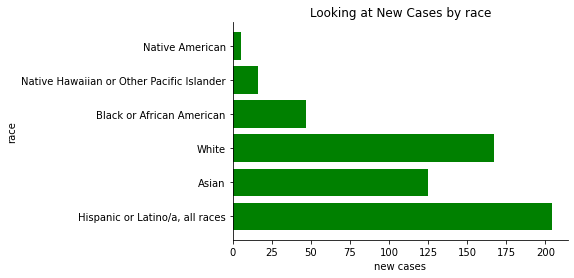

In [282]:
plt.barh(df.race, df["New Cases"], color = "green")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("new cases")
plt.ylabel("race")
plt.title("Looking at New Cases by race")

### Insight
* Hispanic or Latino/a races have experienced the most new covid cases far greater than any other races of over 200 cases from 2020-2021 followed by White and Asian groups as the second and third highest cases respectively

In [283]:
df["Specimen Collection Date"] = df["Specimen Collection Date"].str.slice(0,10)
df["Specimen Collection Date"] = pd.to_datetime(df["Specimen Collection Date"])

In [284]:
start = pd.to_datetime('2021-01-01')
year20 = df[df["Specimen Collection Date"] < start]
year21 = df[df["Specimen Collection Date"] >= start]

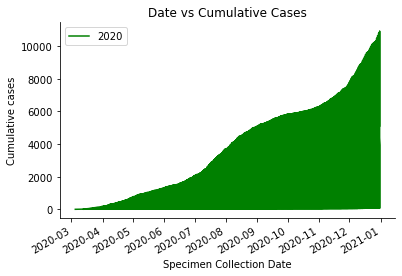

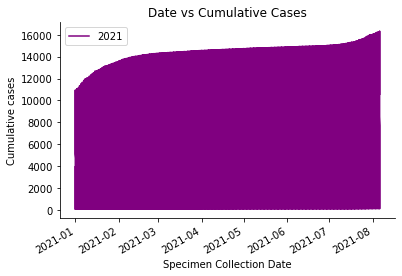

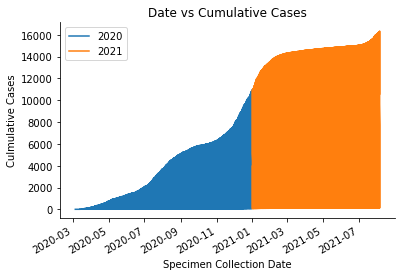

In [294]:
year20.plot(x = 'Specimen Collection Date', y = 'Cumulative Cases', label = '2020', kind = "line", color = "green")
plt.title("Date vs Cumulative Cases")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Cumulative cases")

year21.plot(x = 'Specimen Collection Date', y = 'Cumulative Cases', label = '2021', kind = "line", color = "purple")
plt.title("Date vs Cumulative Cases")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel("Cumulative cases")

ax = year20.plot(x = "Specimen Collection Date", y = 'Cumulative Cases', label = '2020', kind = 'line')
ax.set_ylabel("Culmulative Cases")
year21.plot(x = 'Specimen Collection Date', y = 'Cumulative Cases', label = '2021', ax = ax, kind = 'line')
plt.title("Date vs Cumulative Cases")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Insight
* Comparing 2020 to 2021, 2020 has a much steeper slope from the beginning to end compared to 2021 which makes sense because of the increase in vaccine supply and medical advancements allowing for cumulative cases to be more controlled even though there are more cumulative cases in 2021 than 2020.

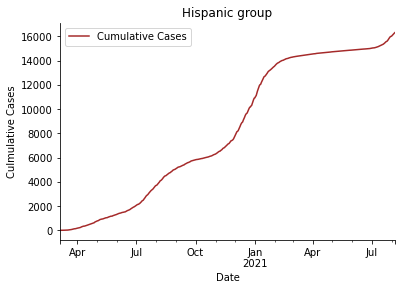

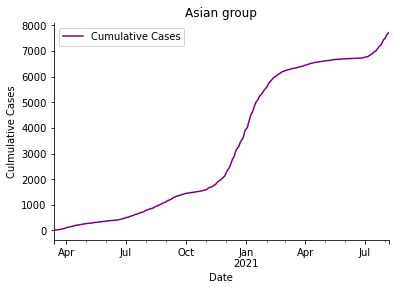

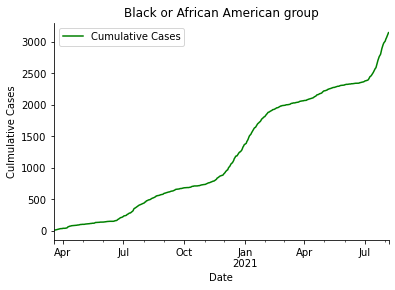

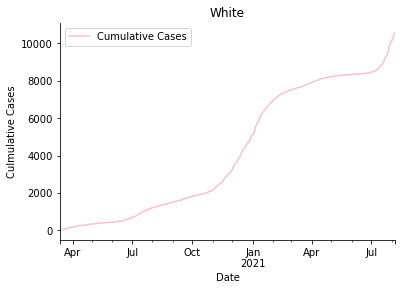

In [295]:
# Because Hispanic or Latino/a group were among the highest so i wanted to compare the cumulative cases with some of the other races
hisp_df = df[df.race == "Hispanic or Latino/a, all races"]
hisp_df.plot(x = "Specimen Collection Date", y = "Cumulative Cases", color = "brown")
plt.xlabel("Date")
plt.ylabel("Culmulative Cases")
plt.title("Hispanic group")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

hisp_df = df[df.race == "Asian"]
hisp_df.plot(x = "Specimen Collection Date", y = "Cumulative Cases", color = "purple")
plt.xlabel("Date")
plt.ylabel("Culmulative Cases")
plt.title("Asian group")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

hisp_df = df[df.race == "Black or African American"]
hisp_df.plot(x = "Specimen Collection Date", y = "Cumulative Cases", color = "green")
plt.xlabel("Date")
plt.ylabel("Culmulative Cases")
plt.title("Black or African American group")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

hisp_df = df[df.race == "White"]
hisp_df.plot(x = "Specimen Collection Date", y = "Cumulative Cases", color = "pink")
plt.xlabel("Date")
plt.ylabel("Culmulative Cases")
plt.title("White")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Insight
* Similarly across most racial or ethnic groups, there is a drastic increase in cumulative COVID-19 cases as presented by the steep slope between October of 2020 - Januarary of 2021
* The curve is then flattened in the transition to Spring and looks like it is about to soar again during the Summer in July. This is apparent across all racial or ethnic groups
* By the y axis, the Hispanic and White groups were among the highest cumulative cases at the time the data was last updated, reaching a high of 10,000+ cases, compared to Black or African American and Asian groups' cumulative cases

# Running Linear and Logistic Regression models to Understand

In [296]:
import statsmodels.formula.api as smf

In [249]:
# Data Cleaning
r_df = data[data["Characteristic Type"] == "Race/Ethnicity"]
r_df = r_df.rename(columns={'Characteristic Group': 'race', 'Cumulative Cases': 'total'}, index={'ONE': 'Row_1'})
r_df = r_df[(r_df["race"] != "Unknown") & (r_df["race"] != "Other") & (r_df["race"] != "Multi-racial")]

In [250]:
r_df["race"].unique()

array(['Asian', 'Black or African American',
       'Hispanic or Latino/a, all races', 'Native American',
       'Native Hawaiian or Other Pacific Islander', 'White'], dtype=object)

In [252]:
r_df.head(3)

,Specimen Collection Date,Characteristic Type,race,Characteristic Group Sort Order,New Cases,total,Population Estimate,Data As Of,Data Loaded At
25,03/03/2020 12:00:00 AM,Race/Ethnicity,Asian,1,NaN,NaN,298108.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:49 AM
26,03/03/2020 12:00:00 AM,Race/Ethnicity,Black or African American,2,NaN,NaN,43782.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:52 AM
27,03/03/2020 12:00:00 AM,Race/Ethnicity,"Hispanic or Latino/a, all races",3,NaN,NaN,133314.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:51 AM


In [255]:
# Linear model
m = smf.ols("total ~ C(race)", data= r_df).fit() # C because race is categorical not numeric
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     549.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:22:20   Log-Likelihood:                -28399.
No. Observations:                3013   AIC:                         5.681e+04
Df Residuals:                    3007   BIC:                         5.685e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                             3311.0781    132.741     24.944      0.000    3050.805    3571.351
C(race)[T.Black or African American]                 -2111.0367    188.187    -11.218      0.000   -2480.024   -1742.049
C(race)[T.Hispanic or Latino/a, all races]            4989.0526    187.001     26.679      0.000    4622.390    5355.715
C(race)[T.Native American]                           -3246.0227    191.979    -16.908      0.000   -3622.446   -2869.599
C(race)[T.Native Hawaiian or Other Pacific Islander] -3060.1836    189.524    -16.147      0.000   -3431.794   -2688.573
C(race)[T.White]                                       894.1484    187.724      4.763      0.000     526.067    1262.230
==============================================================================
Omnibus:                       35.969   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.705
Skew:                           0.022   Prob(JB):                     3.99e-14
Kurtosis:                       3.700   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
* From a linear regression model, the intercept of the total culmulative cases is at 3,311 cases.
* The **increase** in cumulative cases with the Hispanic or Latino ethinic/ racial group is 4,989 cases, whereas with the Caucasian/ white ethinic/ racial group there is only 894 cases.
* The **decrease** in cumulative cases with the African American/ Black ethnic/ racial group is about 2,111 cases, the Native American group is about 3,246 cases, and the Native Hawaiian or Other Pacific islander is about 3060 cases.
* The R-squared is about 0.478 which means that this model is not a perfect fit model with the size of the data, but good enough for this demonstration

In [256]:
m = smf.ols("np.log(total) ~ C(race)", data= r_df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(total)   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     879.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:35:55   Log-Likelihood:                -5033.6
No. Observations:                3013   AIC:                         1.008e+04
Df Residuals:                    3007   BIC:                         1.012e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                7.4544      0.057    131.013      0.000       7.343       7.566
C(race)[T.Black or African American]                    -0.8904      0.081    -11.038      0.000      -1.049      -0.732
C(race)[T.Hispanic or Latino/a, all races]               0.9735      0.080     12.145      0.000       0.816       1.131
C(race)[T.Native American]                              -3.5501      0.082    -43.141      0.000      -3.711      -3.389
C(race)[T.Native Hawaiian or Other Pacific Islander]    -2.3498      0.081    -28.925      0.000      -2.509      -2.191
C(race)[T.White]                                         0.2859      0.080      3.553      0.000       0.128       0.444
==============================================================================
Omnibus:                      667.898   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1377.647
Skew:                          -1.295   Prob(JB):                    7.04e-300
Kurtosis:                       5.064   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The significance of the intercept is not too large for the logistic regression model.
* The presence of cumulative cases will **go down** by ~.89% within the Black or African American ethnic/ racial group
* The presence of cumulative cases will **go down** by ~3.55% within the Native American ethnic/ racial group
* The presence of cumulative cases will **go down** by ~2.35% within the Native Hawaiian or Pacific Islander ethnic/ racial group
* The presence of cumulative cases will **go up** by ~.97% within the Hispanic/ Latino/a ethnic/ racial group
* The presence of cumulative cases will **go up** by ~.29% within the white or Caucasian ethnic/ racial group

## Analyzing Other Characteristic groups using different models

In [217]:
import statsmodels.formula.api as smf

In [204]:
data["Characteristic Type"].unique()

array(['Age Group', 'Comorbidities', 'Gender', 'Homelessness',
       'Race/Ethnicity', 'Sexual Orientation',
       'Single Room Occupancy Tenancy',
       'Skilled Nursing Facility Occupancy', 'Transmission Type'],
      dtype=object)

In [210]:
age_df = data[data["Characteristic Type"] == "Age Group"]
print(age_df.shape)
age_df.head()

(7308, 9)


,Specimen Collection Date,Characteristic Type,Characteristic Group,Characteristic Group Sort Order,New Cases,Cumulative Cases,Population Estimate,Data As Of,Data Loaded At
0,03/03/2020 12:00:00 AM,Age Group,0-4,1,NaN,NaN,39353.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
1,03/03/2020 12:00:00 AM,Age Group,5-10,2,NaN,NaN,38089.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:38 AM
2,03/03/2020 12:00:00 AM,Age Group,11-13,3,NaN,NaN,17896.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
3,03/03/2020 12:00:00 AM,Age Group,14-17,4,NaN,NaN,22832.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM
4,03/03/2020 12:00:00 AM,Age Group,18-20,5,NaN,NaN,20407.0,08/10/2021 04:30:02 PM,08/11/2021 09:01:36 AM


In [230]:
age_df = age_df.rename(columns={'Characteristic Group': 'ages', 'Cumulative Cases': 'total'}, index={'ONE': 'Row_1'})

In [232]:
# Got rid of Unkown data rows and Na in Cumulative cases
df = age_df[age_df["ages"] != "Unknown"]
df = df[df["total"].notnull()]
print(df["ages"].unique())

['40-49' '30-39' '50-59' '25-29' '21-24' '70-79' '60-69' '80+' '18-20'
 '0-4' '14-17' '5-10' '11-13']


In [234]:
m = smf.ols("total ~ ages", data= df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     383.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:06:21   Log-Likelihood:                -56501.
No. Observations:                6515   AIC:                         1.130e+05
Df Residuals:                    6502   BIC:                         1.131e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          559.7125     64.093      8.733      0.000     434.070     685.355
C(ages)[T.11-13]  -127.3982     91.260     -1.396      0.163    -306.297      51.501
C(ages)[T.14-17]    44.4669     90.734      0.490      0.624    -133.401     222.335
C(ages)[T.18-20]   158.8213     89.961      1.765      0.078     -17.531     335.174
C(ages)[T.21-24]   904.1934     89.613     10.090      0.000     728.523    1079.864
C(ages)[T.25-29]  1936.3500     89.527     21.629      0.000    1760.847    2111.853
C(ages)[T.30-39]  3973.2544     89.442     44.423      0.000    3797.918    4148.591
C(ages)[T.40-49]  2437.5283     89.400     27.265      0.000    2262.275    2612.782
C(ages)[T.5-10]    183.7644     91.163      2.016      0.044       5.056     362.473
C(ages)[T.50-59]  1724.2777     89.442     19.278      0.000    1548.942    1899.614
C(ages)[T.60-69]   933.9260     89.656     10.417      0.000     758.171    1109.681
C(ages)[T.70-79]   217.7306     89.613      2.430      0.015      42.060     393.401
C(ages)[T.80+]     169.4729     89.742      1.888      0.059      -6.451     345.397
==============================================================================
Omnibus:                      195.750   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.901
Skew:                           0.118   Prob(JB):                    3.37e-103
Kurtosis:                       4.297   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inisght
* The **increase** in cumulative cases with the 30-39 year old age group is 3973 cases, which is the highest compared to other age groups

In [236]:
m = smf.ols("np.log(total) ~ ages", data= df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(total)   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:07:08   Log-Likelihood:                -10997.
No. Observations:                6515   AIC:                         2.202e+04
Df Residuals:                    6502   BIC:                         2.211e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7202      0.059     96.370      0.000       5.604       5.837
C(ages)[T.11-13]    -0.1073      0.085     -1.270      0.204      -0.273       0.058
C(ages)[T.14-17]     0.1884      0.084      2.242      0.025       0.024       0.353
C(ages)[T.18-20]     0.3106      0.083      3.728      0.000       0.147       0.474
C(ages)[T.21-24]     0.9594      0.083     11.560      0.000       0.797       1.122
C(ages)[T.25-29]     1.4748      0.083     17.787      0.000       1.312       1.637
C(ages)[T.30-39]     2.1554      0.083     26.021      0.000       1.993       2.318
C(ages)[T.40-49]     1.7844      0.083     21.552      0.000       1.622       1.947
C(ages)[T.5-10]      0.3933      0.084      4.659      0.000       0.228       0.559
C(ages)[T.50-59]     1.5213      0.083     18.366      0.000       1.359       1.684
C(ages)[T.60-69]     1.1160      0.083     13.441      0.000       0.953       1.279
C(ages)[T.70-79]     0.4795      0.083      5.777      0.000       0.317       0.642
C(ages)[T.80+]       0.3988      0.083      4.799      0.000       0.236       0.562
==============================================================================
Omnibus:                     1264.621   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.426
Skew:                          -1.274   Prob(JB):                         0.00
Kurtosis:                       4.237   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inisght
* With the logistic regression, the presence of cumulative cases will **go up** by ~.216% within the age group of 30-39 which is among the highest amongst the other age groups